In [2]:
import pandas as pd
import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%autosave 120
sns.set(rc={'figure.figsize':(11.7,8.27)})
!pwd

Autosaving every 120 seconds
/home/pavel/etalab/code/csv_detective_api/doc


In [3]:
metrics = ['accuracy', 'weighted avg', 'O']

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,10), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 10})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [22]:
df_annotations = pd.read_csv("../csv_detective_ml/data/columns_annotation_nonewtypes.csv").iloc[:, 0:5]

In [180]:
# print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O")))
res_dict = classification_report(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O"), output_dict=True)
conf_matrix_csv_rb = confusion_matrix(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O"))
foo = pd.DataFrame(res_dict).transpose()
classif_df = foo.drop(metrics)
print(classification_report(df_annotations.human_detected.dropna(), df_annotations.csv_detected.fillna("O")))

/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  '

,f1-score,precision,recall,support
adresse,1.000000,1.000000,1.000000,22.0
booleen,0.759703,0.638003,0.938776,490.0
code_commune_insee,0.823529,0.833333,0.813953,43.0
code_departement,0.361702,0.354167,0.369565,46.0
code_postal,0.876033,1.000000,0.779412,68.0
code_region,0.865672,0.763158,1.000000,29.0
commune,0.745763,0.977778,0.602740,73.0
date,0.840336,0.751880,0.952381,105.0
datetime_iso,1.000000,1.000000,1.000000,2.0
departement,0.800000,1.000000,0.666667,9.0


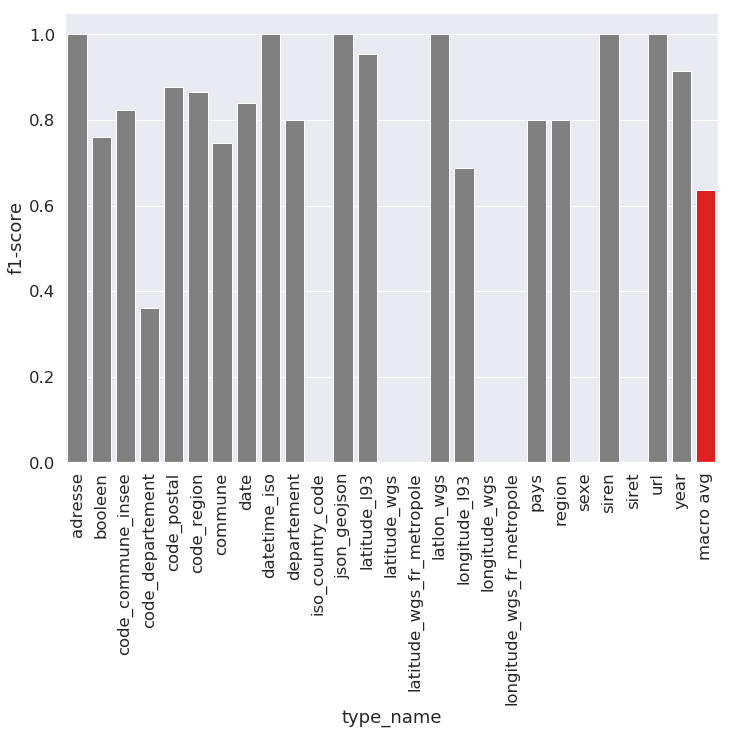

In [169]:
foo = foo[["precision", "recall", "f1-score", "support"]]
foo["type_name"] = foo.index
# print(foo)
# sns.set_palette("colorblind")
sns.set()
sns.set(font_scale=1.5)  # crazy big
pal_bar = ["grey" if "macro" not in f else "red" for f in foo.drop(metrics).index ]
sns.barplot(x="type_name", y="f1-score", data=foo.drop(metrics), palette=pal_bar)
plt.xticks(rotation=90)
plt.savefig("img/rb_f1.png", figsize=(10, 10), dpi=200, transparent=False, bbox_inches="tight")


In [181]:
print_confusion_matrix(conf_matrix_csv_rb.pop("O"), foo.index.values[1:-3]);

ValueError: Shape of passed values is (27, 27), indices imply (26, 26)

In [12]:
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.human_detected.fillna("O")))

                    precision    recall  f1-score   support

                 O       1.00      1.00      1.00      3608
           adresse       1.00      1.00      1.00        22
           booleen       1.00      1.00      1.00       490
      code_commune       1.00      1.00      1.00        14
code_commune_insee       1.00      1.00      1.00        43
  code_departement       1.00      1.00      1.00        46
       code_postal       1.00      1.00      1.00        68
       code_region       1.00      1.00      1.00        29
           commune       1.00      1.00      1.00        73
              date       1.00      1.00      1.00       105
      datetime_iso       1.00      1.00      1.00         2
      denomination       1.00      1.00      1.00        29
       departement       1.00      1.00      1.00         9
      json_geojson       1.00      1.00      1.00         2
      latitude_l93       1.00      1.00      1.00        22
      latitude_utm       1.00      1.00

In [7]:
ordered_ids = df_annotations.id.unique()
print(len(ordered_ids))

146


In [14]:
json_csv_detective = json.load(open("../csv_data_top150.json"))

In [15]:
json_csv_detective

{'bbec31fd-8a97-469e-94c3-482c18d5ccaa': {'encoding': 'UTF-8',
  'separator': ',',
  'header_row_idx': 0,
  'header': ['"REG"',
   '"DEP"',
   '"COMM"',
   '"ANNEE_DEPOT"',
   '"ID_PC"',
   '"CAT_MOA"',
   '"TYPE_MOA"',
   '"RS_D"',
   '"DENOMINATION_D"',
   '"SIRET_D"',
   '"ADR_NUM_D"',
   '"ADR_TYPEVOIE_D"',
   '"ADR_LIBELLEVOIE_D"',
   '"ADR_LIEUDIT_D"',
   '"ADR_BP_D"',
   '"ADR_CP_D"',
   '"ADR_LOCALITE_D"',
   '"ADR_CEDEX_D"',
   '"ADR_PAYS_D"',
   '"ADR_NUM_T"',
   '"ADR_TYPEVOIE_T"',
   '"ADR_LIBELLEVOIE_T"',
   '"ADR_LIEUDIT_T"',
   '"ADR_BP_T"',
   '"ADR_CP_T"',
   '"ADR_LOCALITE_T"',
   '"ADR_CEDEX_T"',
   '"CADASTRE1"',
   '"CADASTRE2"',
   '"CADASTRE3"',
   '"TYPE_EVT"',
   '"SUPERFICIE_T"',
   '"LOTISSEMENT"',
   '"ZAC"',
   '"AFU"',
   '"NB_LGT_1P"',
   '"NB_LGT_2P"',
   '"NB_LGT_3P"',
   '"NB_LGT_4P"',
   '"NB_LGT_5P"',
   '"NB_LGT_6P"',
   '"NB_LGT_DEMOLIS"',
   '"NB_LGT_IND_CREES"',
   '"NB_LGT_COL_CREES"',
   '"NB_LGT_TOT_CREES"',
   '"NB_NIV_MAX"',
   '"NATURE_PROJ

In [18]:
def get_results_list(method="ml"):
    all_columns = []
    col_method = "columns_{}".format(method) 
    for _, row in df_annotations.iterrows():
        print(row["id"])
        if row["id"] in json_csv_detective:
            if col_method not in json_csv_detective[row["id"]]:
                all_columns.append(np.nan)
                continue
            if row["columns"] in json_csv_detective[row["id"]][col_method] :
                all_columns.append(json_csv_detective[row["id"]][col_method][row["columns"]][0])
            else:
                all_columns.append(np.nan)

        else:
            print("You should not be here :(")
            
    return all_columns


In [29]:
ml_results = get_results_list("ml")

03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
03c24270-75ac-4a06-9648-44b6b5a5e0f7
0

a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a71ae361-8981-4b7f-ab33-7e0e2b253a67
a

bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
bbec31fd-8a97-469e-94c3-482c18d5ccaa
b

5d162f34-60c4-447a-b41f-6a2deedf685c
5d162f34-60c4-447a-b41f-6a2deedf685c
5d162f34-60c4-447a-b41f-6a2deedf685c
5f6b55dc-b509-4f64-8930-609d385b32ed
5f6b55dc-b509-4f64-8930-609d385b32ed
5f6b55dc-b509-4f64-8930-609d385b32ed
5f6b55dc-b509-4f64-8930-609d385b32ed
5f6b55dc-b509-4f64-8930-609d385b32ed
5f6b55dc-b509-4f64-8930-609d385b32ed
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6070e900-2c9a-46bc-8b90-e4f6d002ad34
6

e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526
e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526
e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526
e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526
e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e6078ff5-0904-4402-a288-bca5e037034d
e

1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1aa6f046-5a99-425b-97c2-34748deb6012
1

c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c678489c-21c9-471e-936a-b4ea651e359d
c

86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
86c64436-427f-4042-a4ee-ed0aa31bac76
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8868400a-666f-46a9-8188-267440e3a69d
8

In [30]:
len(ml_results) == len(df_annotations)


True

In [31]:
df_annotations["ML_model"] = ml_results

In [34]:
df_annotations["RB_model"] = rb_results

In [32]:
from sklearn.metrics import f1_score
f1_score(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O"), average="macro")

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.832866785145522

In [36]:
f1_score(df_annotations.human_detected.fillna("O"), df_annotations.RB_model.fillna("O"), average="macro")

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.4847535738372639

In [37]:
rb_results

['code_departement',
 nan,
 'code_commune_insee',
 'year',
 nan,
 'code_departement',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'code_postal',
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 'booleen',
 'booleen',
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'date',
 'date',
 'date',
 'code_departement',
 nan,
 nan,
 'year',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'code_postal',
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'code_postal',
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 'booleen',
 'booleen',
 nan,
 nan,
 'booleen',
 'booleen',

In [19]:
#df_annotations.iloc[77]
!hostname

etalab-pavel


In [35]:
f1_score(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O"), average="macro")

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6353432653219485

In [34]:
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O")))

                            precision    recall  f1-score   support

                         O       0.95      0.90      0.92      3683
                   adresse       1.00      1.00      1.00        22
                   booleen       0.64      0.94      0.76       490
        code_commune_insee       0.83      0.81      0.82        43
          code_departement       0.35      0.37      0.36        46
               code_postal       1.00      0.78      0.88        68
               code_region       0.76      1.00      0.87        29
                   commune       0.98      0.60      0.75        73
                      date       0.75      0.95      0.84       105
              datetime_iso       1.00      1.00      1.00         2
               departement       1.00      0.67      0.80         9
          iso_country_code       0.00      0.00      0.00         0
              json_geojson       1.00      1.00      1.00         2
              latitude_l93       0.95      0.95

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'reca

In [33]:
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O")))

                    precision    recall  f1-score   support

                 O       0.97      0.99      0.98      3683
           adresse       0.33      0.14      0.19        22
           booleen       0.99      0.89      0.94       490
code_commune_insee       0.95      0.86      0.90        43
  code_departement       0.98      0.91      0.94        46
       code_postal       1.00      1.00      1.00        68
       code_region       0.93      0.93      0.93        29
           commune       0.92      0.84      0.88        73
              date       0.98      0.94      0.96       105
      datetime_iso       1.00      1.00      1.00         2
       departement       1.00      0.89      0.94         9
      json_geojson       1.00      1.00      1.00         2
      latitude_l93       0.95      0.95      0.95        22
      latitude_wgs       0.78      0.70      0.74        10
        latlon_wgs       0.00      0.00      0.00         4
     longitude_l93       0.96      1.00

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
# print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O")))
res_dict_ML = classification_report(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O"), output_dict=True)
conf_matrix_csv_ml = confusion_matrix(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O"))
df_ml = pd.DataFrame(res_dict_ML).transpose()
df_ml = df_ml.drop(metrics)
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O")))

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    precision    recall  f1-score   support

                 O       0.97      0.99      0.98      3683
           adresse       0.33      0.14      0.19        22
           booleen       0.99      0.89      0.94       490
code_commune_insee       0.95      0.86      0.90        43
  code_departement       0.98      0.91      0.94        46
       code_postal       1.00      1.00      1.00        68
       code_region       0.93      0.93      0.93        29
           commune       0.92      0.84      0.88        73
              date       0.98      0.94      0.96       105
      datetime_iso       1.00      1.00      1.00         2
       departement       1.00      0.89      0.94         9
      json_geojson       1.00      1.00      1.00         2
      latitude_l93       0.95      0.95      0.95        22
      latitude_wgs       0.78      0.70      0.74        10
        latlon_wgs       0.00      0.00      0.00         4
     longitude_l93       0.96      1.00

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


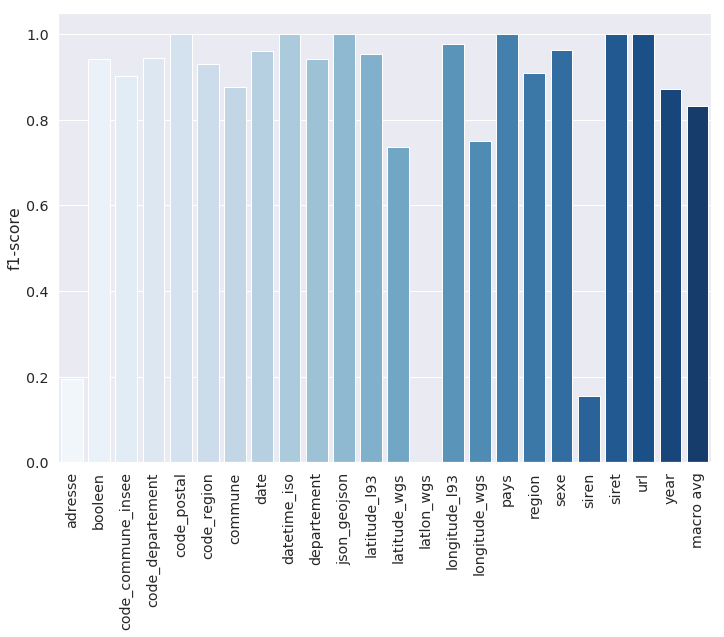

In [44]:
df_ml2 = df_ml[["precision", "recall", "f1-score", "support"]]
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set(font_scale=1.3)  # crazy big
# Create bar plot with fmeasures
plt.xticks(rotation=90)
sns.barplot(x=df_ml2.index, y="f1-score", data=df_ml2, palette="Blues")
plt.savefig("img/ml_f1.svg", figsize=(10, 10), dpi=200, transparent=False, bbox_inches="tight")



In [40]:
!pwd

/home/pavel/etalab/code/csv_detective_api/doc
